<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/AutoML_for_Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install auto_ts

     |████████████████████████████████| 51kB 2.4MB/s 
     |████████████████████████████████| 1.3MB 7.0MB/s 
     |████████████████████████████████| 962kB 32.3MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656578 sha256=685280f596c1aec84feabb6ff9dba73161d81f98ec24c9116c0a54ffedb8ed73
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import auto_ts as AT

Running Auto Timeseries version: 0.0.20...Call by using:
        auto_ts.Auto_Timeseries(traindata, ts_column,
                            target, sep,  score_type='rmse', forecast_period=5,
                            time_interval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None, model_type='stats',
                            verbose=1)
    To run three models from Stats, ML and FB Prophet, set model_type='best'
To remove previous versions, perform 'pip uninstall auto_ts'
To get the latest version, perform "pip install auto_ts --no-cache-dir --ignore-installed"


In [3]:
from google.colab import files
uploaded = files.upload()

Saving electricity_c.csv to electricity_c.csv


In [4]:
df1 = pd.read_csv('electricity_c.csv')

In [5]:
df1.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,1/1/2016,365,1423.5,219.0,247.73,31
1,2/1/2016,292,1138.8,175.2,234.11,31
2,3/1/2016,130,507.0,78.0,123.85,29
3,4/1/2016,117,456.3,70.2,111.22,29
4,5/1/2016,136,530.4,81.6,118.37,29


In [6]:
df1['Bill_Date'] = pd.to_datetime(df1['Bill_Date'])

In [7]:
df1.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [8]:
df2 = df1.set_index('Bill_Date')

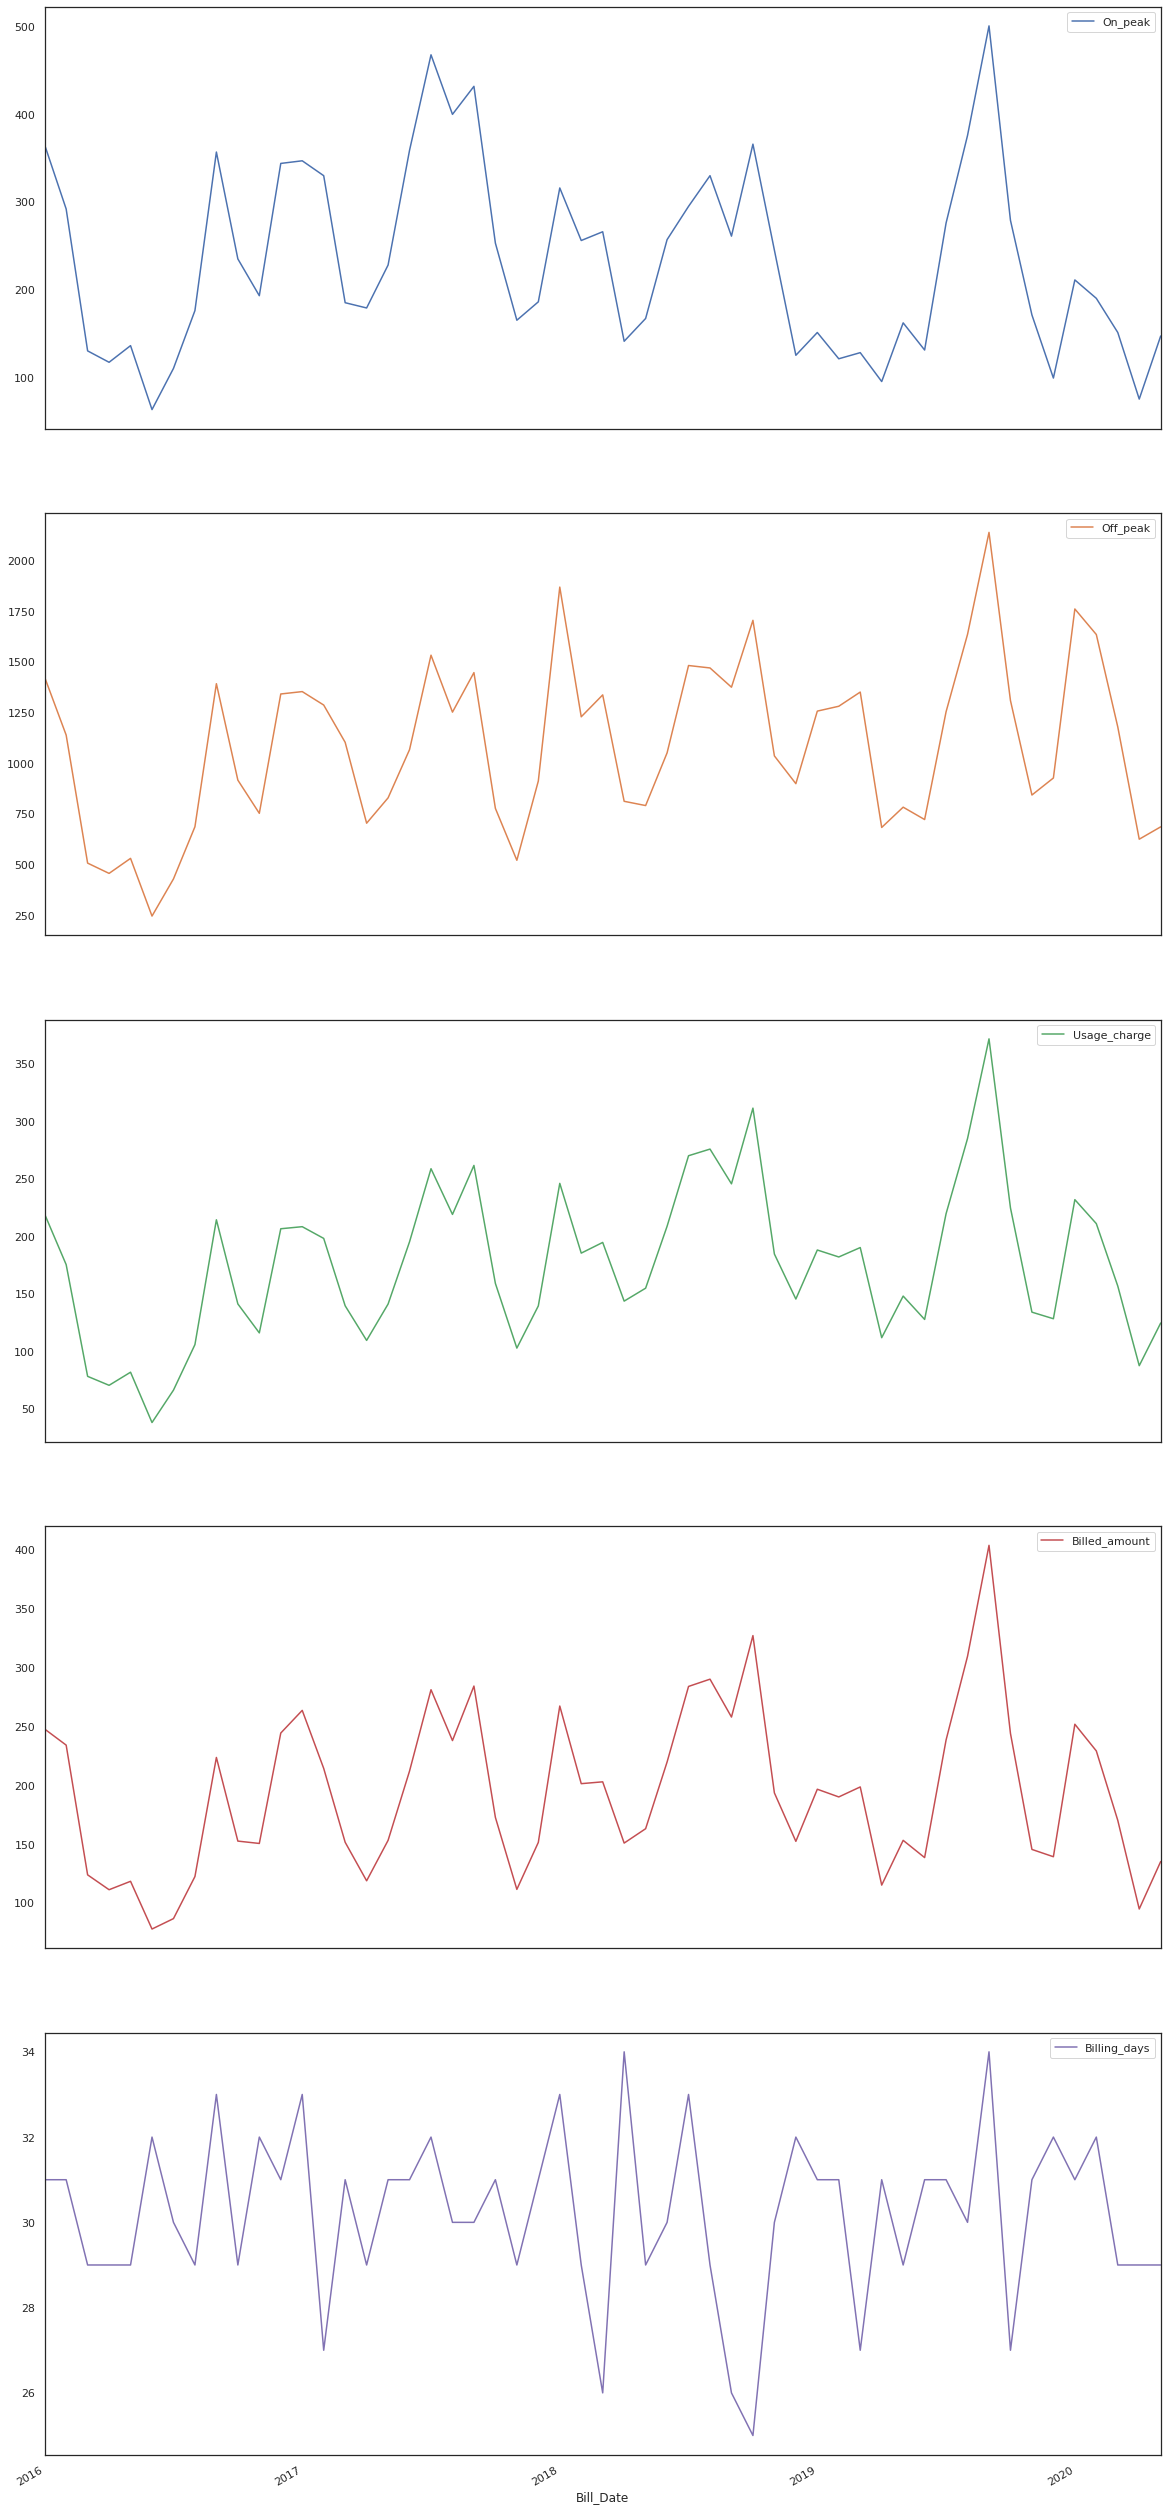

In [9]:
df2.plot(subplots=True, figsize=(20,50));

In [10]:
df1.columns

Index(['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount',
       'Billing_days'],
      dtype='object')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bill_Date      53 non-null     datetime64[ns]
 1   On_peak        53 non-null     int64         
 2   Off_peak       53 non-null     float64       
 3   Usage_charge   53 non-null     float64       
 4   Billed_amount  53 non-null     float64       
 5   Billing_days   53 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.6 KB


In [12]:
df1.shape

(53, 6)

In [13]:
df1.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [14]:
df1.set_index('Bill_Date')

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.00,247.73,31
2016-02-01,292,1138.8,175.20,234.11,31
2016-03-01,130,507.0,78.00,123.85,29
2016-04-01,117,456.3,70.20,111.22,29
2016-05-01,136,530.4,81.60,118.37,29
2016-06-01,63,245.7,37.80,77.81,32
2016-07-01,110,429.0,66.00,86.67,30
2016-08-01,176,686.4,105.60,122.40,29
2016-09-01,357,1392.3,214.20,223.62,33


In [15]:
final_df = df1.copy()

In [16]:
train = final_df[:50]
test = final_df[50:]
print (train.shape, test.shape)

(50, 6) (3, 6)


In [17]:
final_df['Bill_Date']=pd.to_datetime(final_df['Bill_Date'])

In [18]:
ts_column = 'Bill_Date'
sep=','
target = 'Billed_amount'

Input is data frame. Performing Time Series Analysis
    Dataframe loaded successfully. Shape of data set = (50, 5)
    Target variable = Billed_amount
Time Interval is given as Months

Running Facebook Prophet Model...
Preparing Time Series data for FB Prophet: sample row before
             Billed_amount  On_peak  Off_peak  Usage_charge  Billing_days
Bill_Date                                                               
2016-01-01         247.73      365    1423.5         219.0            31
Time Series data: sample row after transformation
           ds       y  On_peak  Off_peak  Usage_charge  Billing_days
0 2016-01-01  247.73      365    1423.5         219.0            31
    Fit-Predict data (shape=(50, 2)) with Confidence Interval = 0.95...


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Building Forecast dataframe. Forecast Period = 6


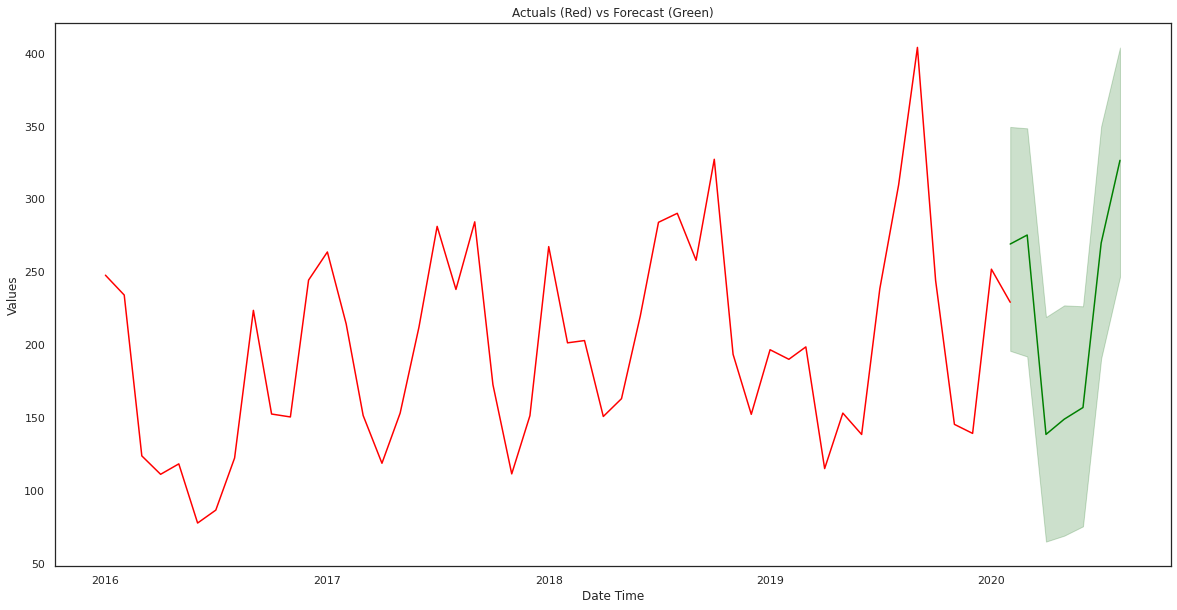

    RMSE = 39.91
    Std Deviation of Originals = 68.88
    Normalized RMSE = 58%

Running PyFlux Model...
Cycling through various (p,d,q) parameters

Best Params Selected (based on rmse): (3, 1, 3)
Dynamic 6-period Forecasts:
    RMSE = 113.93
    Std Deviation of Originals = 64.13
    Normalized RMSE = 178%

Running Non Seasonal ARIMA Model...

Differencing = 0
 Iteration 0 completed...
    Best AR order p = 0, MA order q = 3, Interim metric = 480.447

Differencing = 1
    Best AR order p = 0, MA order q = 3, Interim metric = 473.711

Best model is: Non Seasonal ARIMA(0,1,3), aic = 473.711
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
Dynamic predictions erroring but continuing...

Dynamic 6-period Forecasts:
                             ARIMA Model Results                              
Dep. Variable:        D.Billed_amount   No. Observations:                   43
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -231

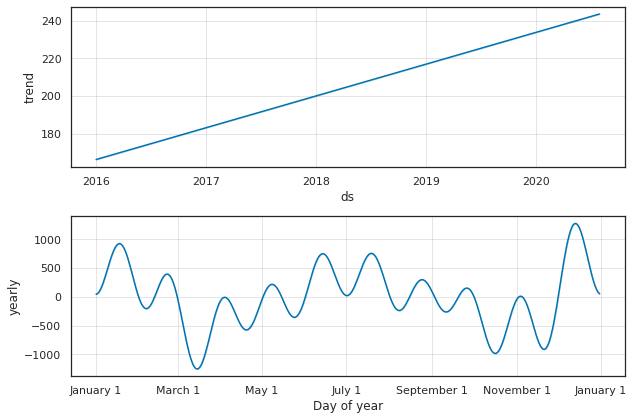

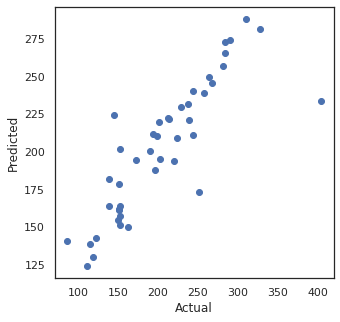

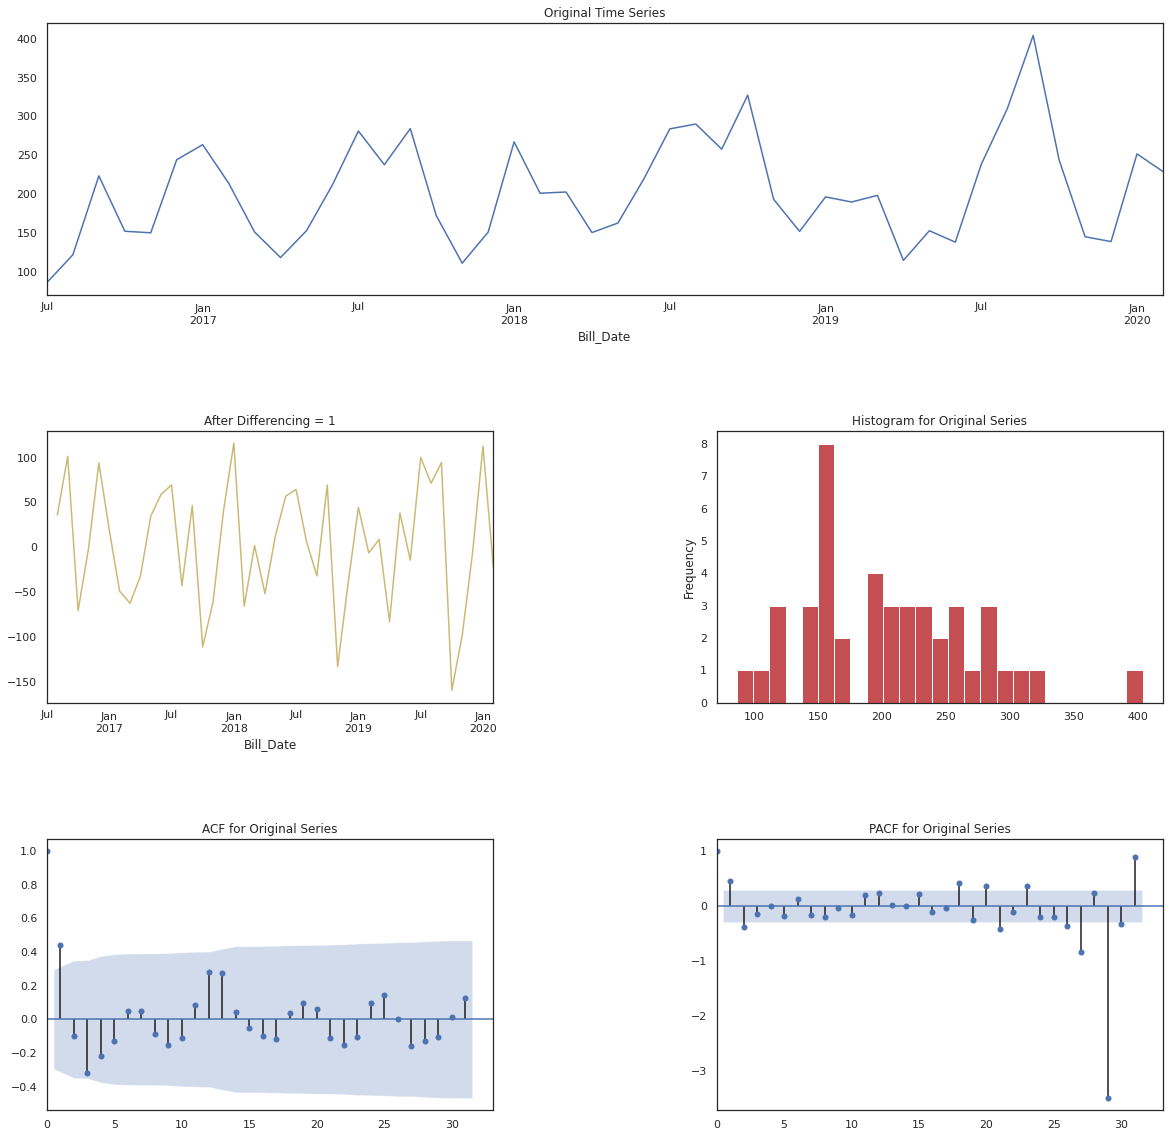


Best Model is:
    FB_Prophet
    Best Model Forecasts: [212.7912669  201.479645   104.6525523  113.84473249 145.46329079
 165.98211532 195.68268584 188.80549366 248.56798017 178.08926727
 140.35609375 203.09455071 227.62423449 165.16176902 148.16803543
 121.25359542 146.69235633 163.19266535 213.13869827 222.69884433
 277.85372891 209.10096487 147.39210372 181.99981746 244.22247547
 199.20915277 191.13093461 127.84041073 147.66982156 160.748907
 231.31118264 256.95702294 307.00622509 239.48253599 153.61965283
 161.17273136 261.81269184 233.86047307 233.50703388 133.61321645
 148.42398338 158.67910471 250.19711359 291.5532215  335.99982018
 269.2190431  159.05898836 140.66143846 280.3998105  269.08812391
 275.26397235 138.58252933 148.98467282 157.01204929 269.79349077
 326.46115931]
    Best Model Score: 39.91


In [19]:
ml_dict = AT.Auto_Timeseries(train, ts_column, target, sep, score_type='rmse', forecast_period=6, time_interval='Months',seasonality=True,
                             model_type='best',verbose=2)

In [20]:
ml_dict['FB_Prophet']['forecast']

array([212.7912669 , 201.479645  , 104.6525523 , 113.84473249,
       145.46329079, 165.98211532, 195.68268584, 188.80549366,
       248.56798017, 178.08926727, 140.35609375, 203.09455071,
       227.62423449, 165.16176902, 148.16803543, 121.25359542,
       146.69235633, 163.19266535, 213.13869827, 222.69884433,
       277.85372891, 209.10096487, 147.39210372, 181.99981746,
       244.22247547, 199.20915277, 191.13093461, 127.84041073,
       147.66982156, 160.748907  , 231.31118264, 256.95702294,
       307.00622509, 239.48253599, 153.61965283, 161.17273136,
       261.81269184, 233.86047307, 233.50703388, 133.61321645,
       148.42398338, 158.67910471, 250.19711359, 291.5532215 ,
       335.99982018, 269.2190431 , 159.05898836, 140.66143846,
       280.3998105 , 269.08812391, 275.26397235, 138.58252933,
       148.98467282, 157.01204929, 269.79349077, 326.46115931])

In [23]:
test.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
50,2020-03-01,151,1179.0,156.56,170.16,29
51,2020-04-01,75,625.0,87.27,94.85,29
52,2020-05-01,147,686.0,124.39,135.19,29
